In [1]:
from MFEA_lib.model import AbstractModel, SMP_MFEA
from MFEA_lib.model.utils import *
import pandas as pd
import numpy as np
import scipy.io
from MFEA_lib.tasks.Benchmark import CEC17_benchmark, GECCO20_benchmark_50tasks
from MFEA_lib.operators.Crossover import *
from MFEA_lib.operators.Mutation import *
from MFEA_lib.operators.Selection import *
from MFEA_lib.tasks.Benchmark import CEC17_benchmark, GECCO20_benchmark_50tasks

In [2]:
model = loadModel("./RESULTS/model.mso")

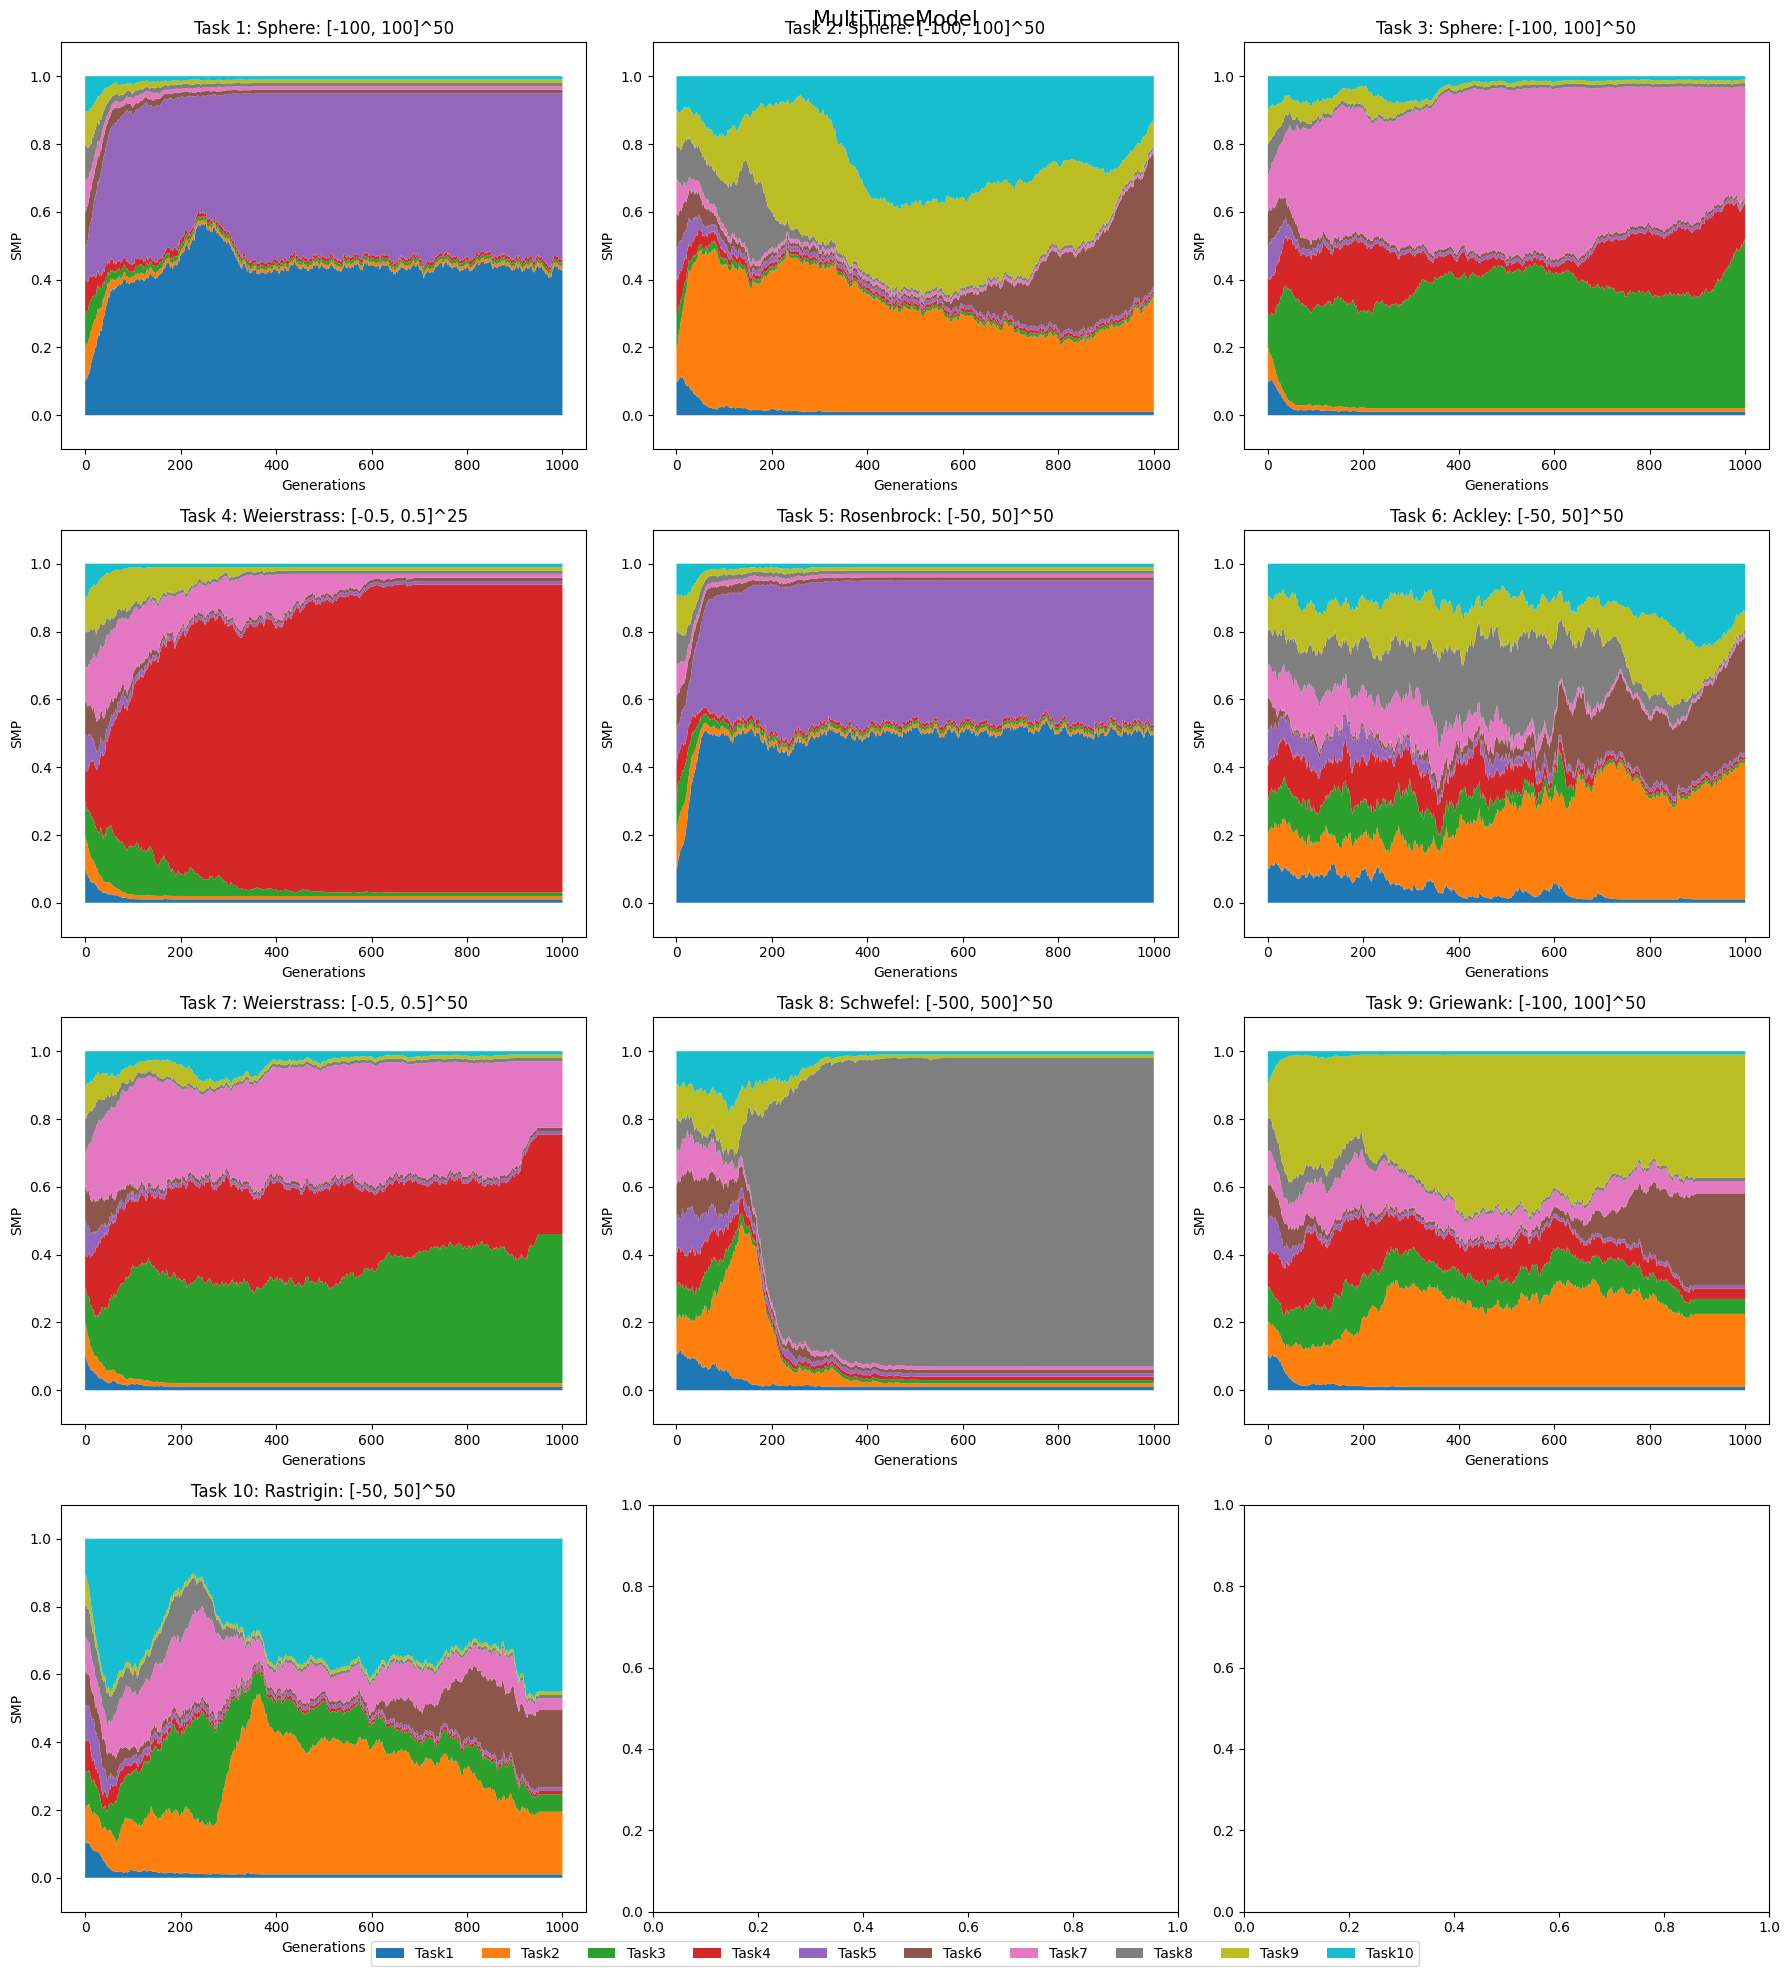

In [7]:
model.render_smp(step=1)

In [3]:
model.history_cost[-1]

array([2.78337185e-13, 1.56706191e-16, 1.38383116e-24, 0.00000000e+00,
       3.07198987e-11, 3.38339667e-09, 0.00000000e+00, 6.36378318e-04,
       0.00000000e+00, 0.00000000e+00])

In [6]:
for id in range(1, 2): 
    smpModel = MultiTimeModel(model= SMP_MFEA)

    smpModel.compile(
        tasks= CEC17_benchmark.get_2tasks_benchmark(id),
        # tasks = task,
        # tasks = GECCO20_benchmark_50tasks.get_items(ID = 2),
        # crossover= SBX_Crossover(nc = 2),
        crossover= newSBX(nc = 2, gamma= 0.4, alpha = 5),
        mutation = GaussMutation(scale = 0.1),
        selection= ElitismSelection(random_percent= 0.),
        search = SHADE(len_mem= 30, p_ontop= 0.1)
    )
    smpModel.fit(
        nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 20,
        lr = 0.1, p_const_intra= 0, p_mutate= 0.1, prob_search = 0.,
        nb_epochs_stop= 1000, swap_po= False,
        evaluate_initial_skillFactor= True
    )
    a = smpModel.run(
        nb_run= 30,
        save_path= './RESULTS/tuning_newsbx_2task_' + str(id) + ".mso"
    )

Time: 00m 46.44s  100 % [====================>]  Pop_size: 3.80E+01  ,  Cost: 2.11E-09  3.08E+01  ,  
[0.5 0.5]
[ 99970. 100036.]
END!
Time: 00m 3.53s    2 % [>                   ]  Pop_size: 1.96E+02  ,  Cost: 1.05E+01  9.84E+03  ,  

KeyboardInterrupt: Saved model, model is not Done


Traceback (most recent call last):
  File "d:\OneDrive - Hanoi University of Science and Technology\My_self\Work\Lab\Code_Lab\KM-MSO\am\MFEA_MSO\MFEA_lib\model\utils.py", line 153, in run
    model.fit(*self.args, **self.kwargs)
  File "d:\OneDrive - Hanoi University of Science and Technology\My_self\Work\Lab\Code_Lab\KM-MSO\am\MFEA_MSO\MFEA_lib\model\SMP_MFEA.py", line 234, in fit
    oa, ob = self.crossover(pa, pb, skf_pa, skf_pa)
  File "d:\OneDrive - Hanoi University of Science and Technology\My_self\Work\Lab\Code_Lab\KM-MSO\am\MFEA_MSO\MFEA_lib\operators\Crossover.py", line 152, in __call__
    idx_swap = np.where(np.random.rand(len(pa)) < 0.5)[0]
KeyboardInterrupt


In [3]:
MFEA_model = loadModel('./RESULTS/MFEA_cec17.mso')
EBS_GA_model = loadModel('./RESULTS/EBS_GA_cec17.mso')
MaTDE_model = loadModel('./RESULTS/MaTDE_cec17.mso')
MaTGA_model = loadModel('./RESULTS/MaTGA_cec17.mso')
MTEA_AD_model = loadModel('./RESULTS/MTEA_AD_cec17.mso')
SA_model = loadModel('./RESULTS/SA_cec17.mso')
LSA_model = loadModel('./RESULTS/LSA_cec17.mso')
SMP_sbx = loadModel("./RESULTS/result/cec_17_10_tasks_sbx.mso")
SMP_newSBX = loadModel("./RESULTS/result/cec_17_10_tasks_newsbx.mso")


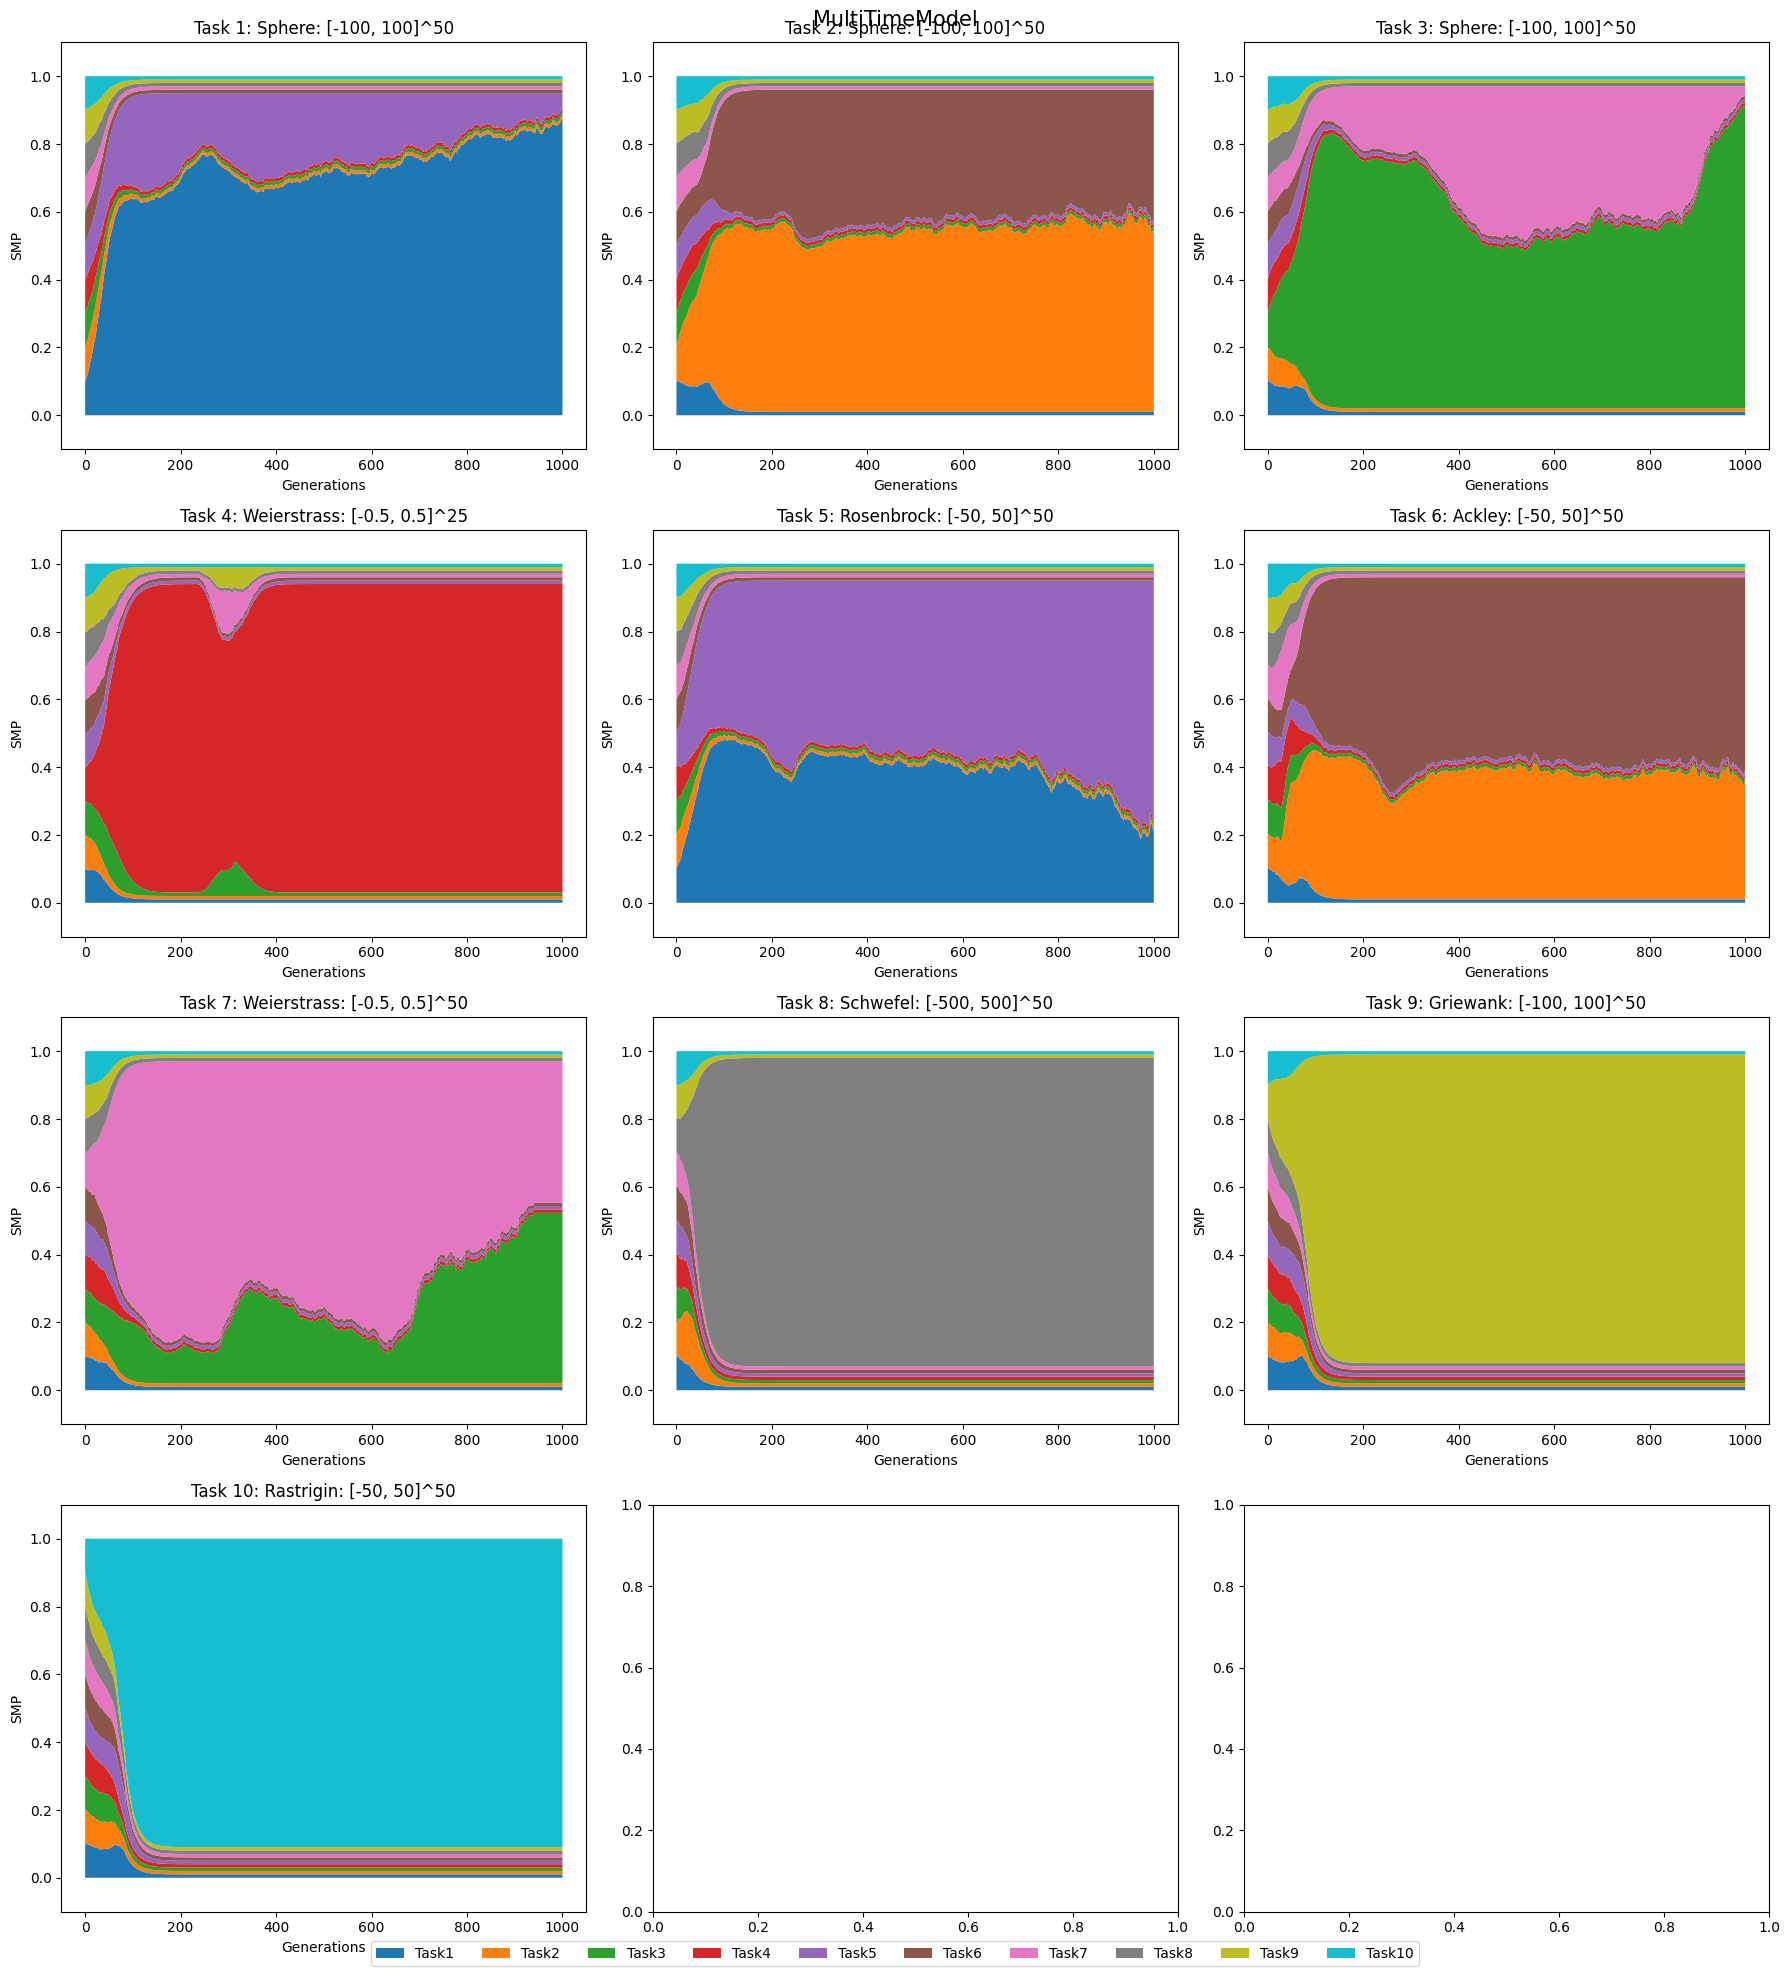

In [4]:
SMP_sbx.render_smp(step=1)

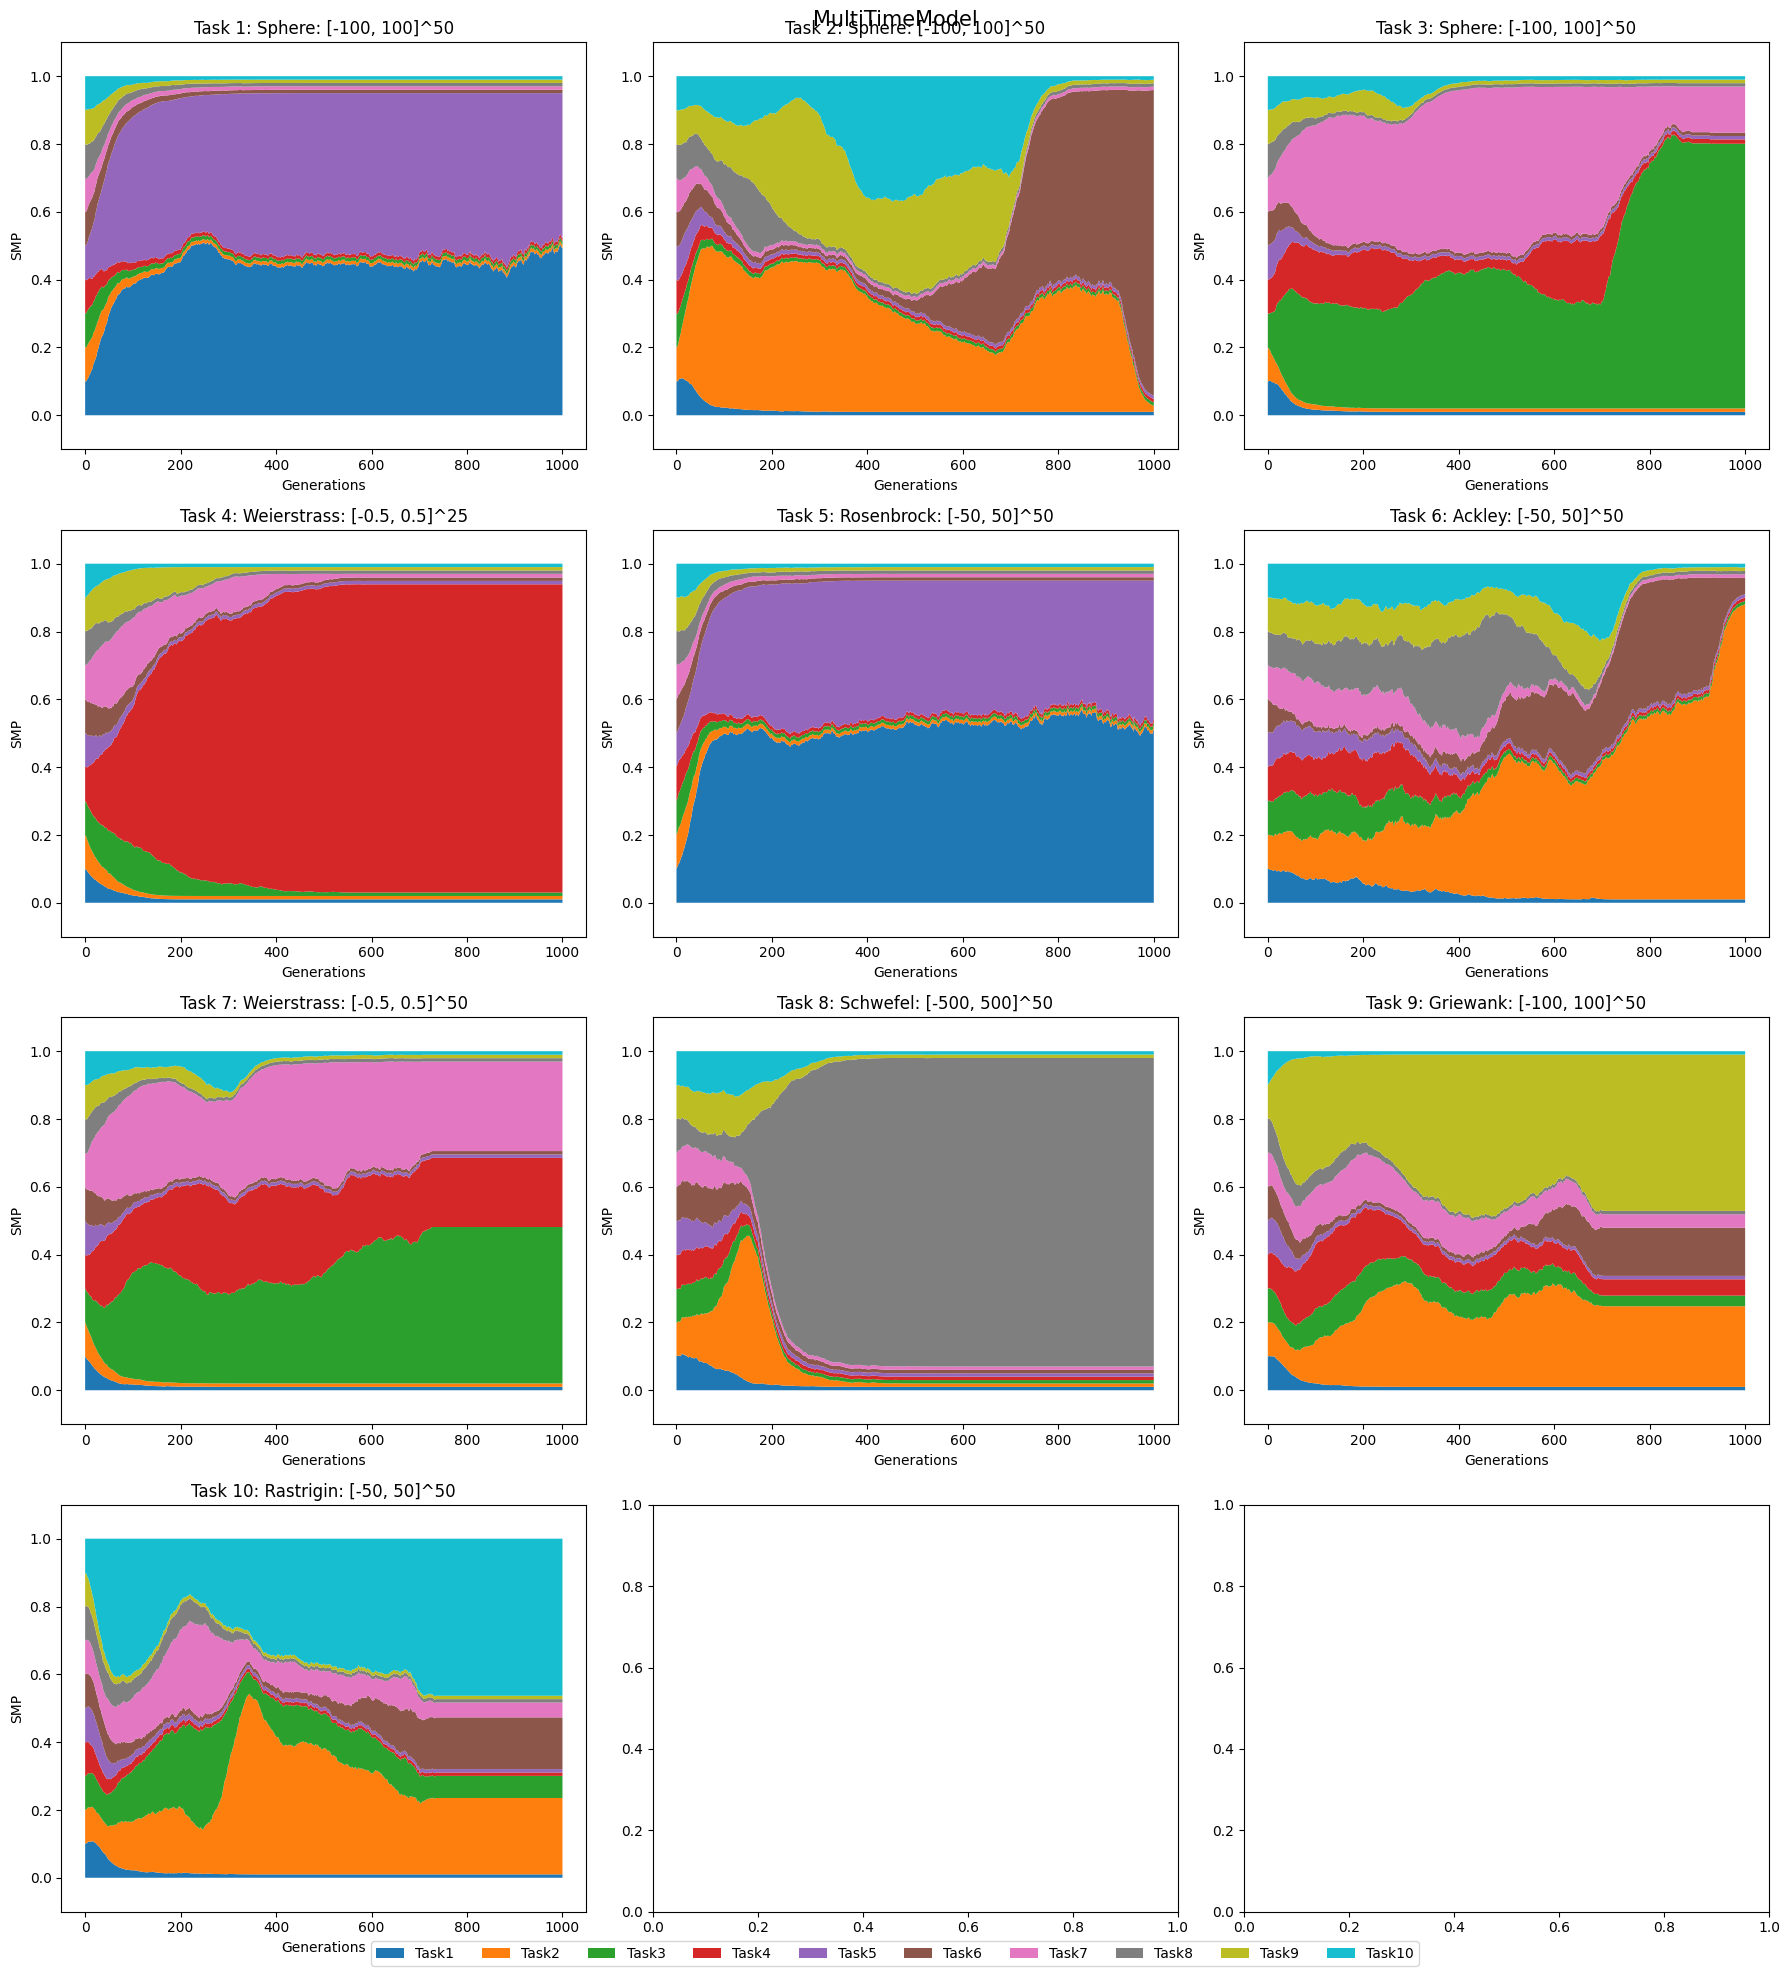

In [3]:
SMP_newSBX.render_smp(step=1)

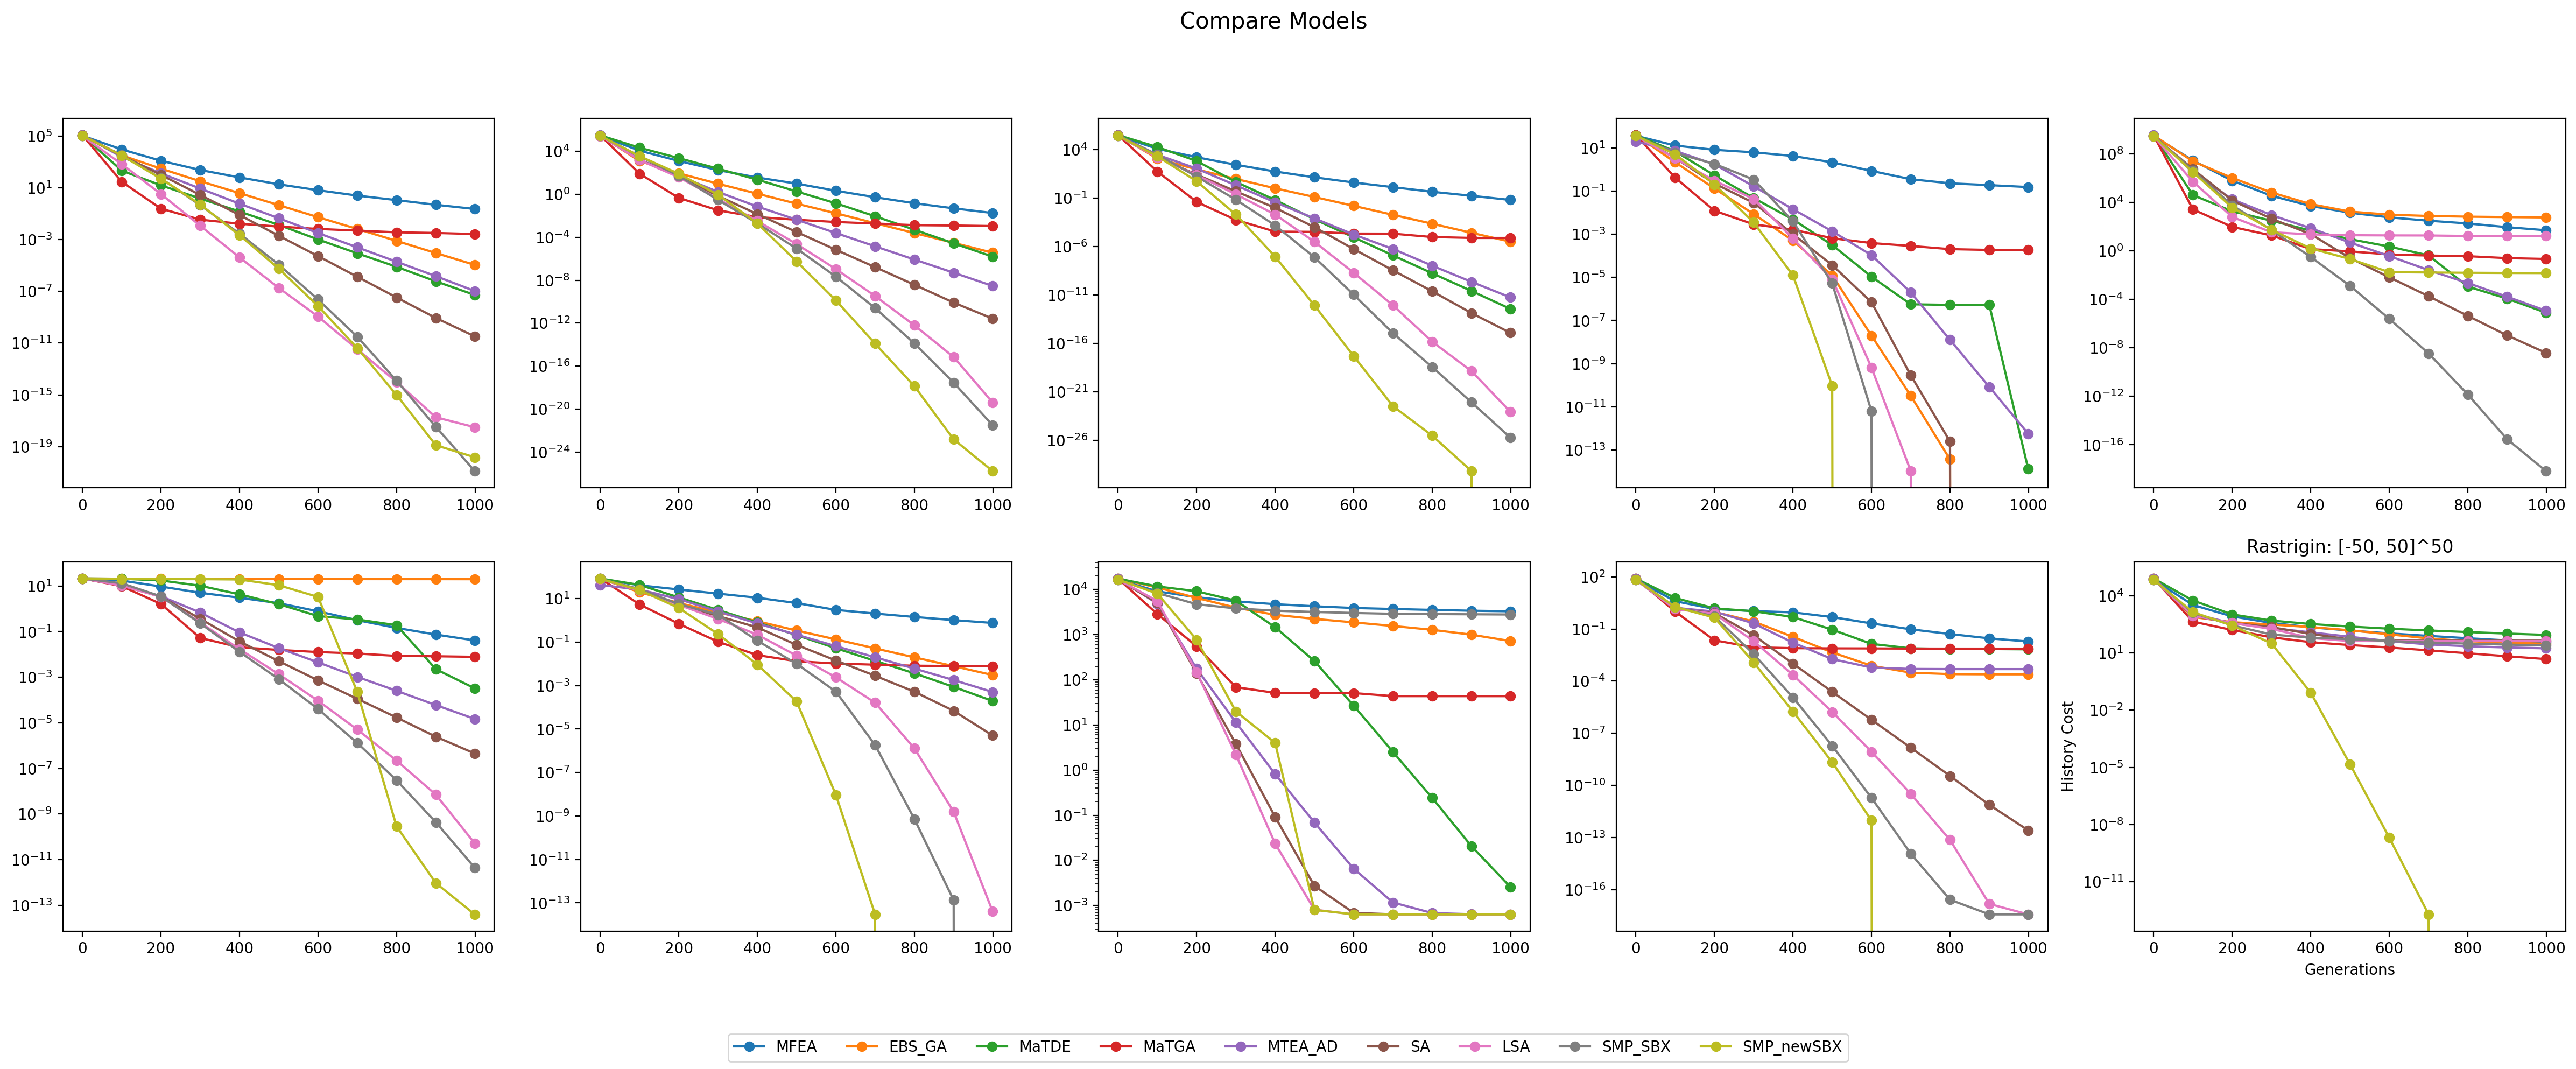

In [4]:
compare = CompareModel(
    models = [MFEA_model, EBS_GA_model, MaTDE_model, MaTGA_model, MTEA_AD_model, SA_model, LSA_model, SMP_sbx, SMP_newSBX],
    label= [...] * 7 + ['SMP_SBX', 'SMP_newSBX'],
)
compare.render(    
    shape = (2, 5),
    min_cost= 0,
    step= 100,
    yscale= 'log'
)

In [13]:
compare.summarizing_compare_result(path="./RESULTS/2tasks/", idx_main_algo= 9, nb_task= 2)

,Better,Equal,Worse
SMP_SBX vs EBS_GA,11,0,7
SMP_SBX vs LSA,11,0,7
SMP_SBX vs MaTDE,11,0,7
SMP_SBX vs MaTGA,6,0,12
SMP_SBX vs MFEA,17,0,1
SMP_SBX vs SA,10,0,8
SMP_SBX vs SBS_GA,9,0,9
SMP_SBX vs SBS_GA_poly,9,0,9
SMP_SBX vs SMP_NEWSBX,6,0,12


In [12]:
compare.summarizing_compare_result(path="./RESULTS/2tasks/", idx_main_algo= 8, nb_task= 2)

,Better,Equal,Worse
SMP_NEWSBX vs EBS_GA,12,0,6
SMP_NEWSBX vs LSA,10,0,8
SMP_NEWSBX vs MaTDE,12,0,6
SMP_NEWSBX vs MaTGA,8,0,10
SMP_NEWSBX vs MFEA,18,0,0
SMP_NEWSBX vs SA,11,0,7
SMP_NEWSBX vs SBS_GA,9,0,9
SMP_NEWSBX vs SBS_GA_poly,9,0,9
SMP_NEWSBX vs SMP_SBX,12,0,6


In [14]:
compare.detail_compare_result()

,MFEA,EBS_GA,MaTDE,MaTGA,MTEA_AD,SA,LSA,SMP_SBX,SMP_newSBX
Task1,0.2306803683118937,1.1041796512728456e-05,5.2448509840324785e-08,0.0026705872776819728,1.0609301724934813e-07,3.3061538714714826e-11,3.168912392798847e-18,(+)1.2040383575662488e-21,1.4984074055564045e-20
Task2,0.018171437665116218,3.681032203235758e-06,1.6047725809275885e-06,0.001115356576805881,2.990552670377746e-09,2.7004188231793198e-12,4.115767650271555e-20,3.0032965103432753e-22,(+)1.6505915217936392e-26
Task3,0.06637609850485167,3.3058988094997382e-06,3.780454713321491e-13,7.99836824342369e-06,5.841638817660246e-12,1.2453502149219146e-15,8.854797474408491e-24,1.7825311377282042e-26,(+)0.0
Task4,0.15509211361656364,(+)0.0,1.3263066634183172e-14,0.00018902136266731547,5.631051180898794e-13,(+)0.0,(+)0.0,(+)0.0,(+)0.0
Task5,50.71698610513365,580.4145475565334,8.054459884058472e-06,0.2174243104776917,1.1687145306498282e-05,3.866938484475334e-09,17.14577598003519,(+)6.865077617226587e-19,0.014865011046514266
Task6,0.04081920302784129,19.878634231807037,0.0003277373502341104,0.00788099665294391,1.4935024698721951e-05,4.546695502168537e-07,5.24695250211001e-11,4.2884510757327614e-12,(+)4.011605862312232e-14
Task7,0.761665023855529,0.0030677093118668527,0.00019759556704077922,0.007821966536942615,0.0005110312939137884,5.111509141874911e-06,4.215767568841652e-14,(+)0.0,(+)0.0
Task8,3296.151781410698,722.3461222912298,0.0025821879342401767,43.47763931314948,0.0006367085414240136,0.0006363783330016303,0.000636378324998077,2795.955483812974,(+)0.0006363783178433853
Task9,0.019118154704695252,0.0002466442088243716,0.006801872064916456,0.007421096596115487,0.0004930758789514581,2.559175094063448e-13,3.700743415417188e-18,3.7007434154171884e-18,(+)0.0
Task10,36.08224289157316,30.49323695358462,89.16722368749038,4.796823959508992,17.626749155381347,44.540968098954075,42.21939907756904,24.77361995318761,(+)0.0


In [16]:
compare.summarizing_compare_result(idx_main_algo=8)

,Better,Equal,Worse
SMP_newSBX vs MFEA,10,0,0
SMP_newSBX vs EBS_GA,9,1,0
SMP_newSBX vs MaTDE,9,0,1
SMP_newSBX vs MaTGA,10,0,0
SMP_newSBX vs MTEA_AD,9,0,1
SMP_newSBX vs SA,8,1,1
SMP_newSBX vs LSA,9,1,0
SMP_newSBX vs SMP_SBX,6,2,2


In [6]:
cec17_10tasks = CEC17_benchmark.get_10tasks_benchmark()

<h3>compare model </h3>

In [7]:
model = loadModel('./RESULTS/50tasks/LSA/LSA_Benchmark_3.mso')
model2 = loadModel('./RESULTS/50tasks/SBS_GA_poly/SBS_GA_poly_Benchmark_3.mso')
compare = CompareModel([model, model2]) 
# compare.render(shape=(10, 5), nb_generations= 1000, figsize=(30,10), yscale='log', label_legend=["before", "after"])


In [8]:
compare.detail_compare_result()

,LSA_Benchmark_3,SBS_GA_poly_Benchmark_3
Task1,(+)212.53275803399617,241.02124516065936
Task2,(+)171.86350058018903,206.7672172426896
Task3,(+)129.17472383846922,201.48119607962465
Task4,(+)180.22710443102122,205.95663367160998
Task5,(+)190.90955495839836,218.65805216867358
Task6,(+)135.8219317789886,242.31428508277122
Task7,209.3750913983087,(+)206.9237686480057
Task8,(+)175.96416738498343,295.3782904205918
Task9,221.06272846459044,(+)204.4518581642936
Task10,(+)212.01044589374655,218.4503048358599


In [5]:
mat = scipy.io.loadmat('/mnt/ee1bd79c-6956-419b-951b-4699528687d7/MFEA_MSO/Data_MTEA-AD/MTEA_AD_10_1_datasum.mat')

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/ee1bd79c-6956-419b-951b-4699528687d7/MFEA_MSO/Data_MTEA-AD/MTEA_AD_10_1_datasum.mat'

In [ ]:
def readFileMTEA_AD(path):
    his11 = scipy.io.loadmat(path).get('data')['EvBestFitness_evn'][0][0].tolist()
    history_cost = [his11[0]]
    for i in range(1, len(his11)):
        for j in range(100):
            history_cost.append(his11[i])
    return np.array(history_cost)

In [7]:
def readFileTM(path):
    his_raw = pd.read_csv(path, header= None, usecols= np.arange(1, 301).tolist()).to_numpy()
    arr = []
    for i in range(10):
        arr.append(np.arange(i, 300, 10).tolist())
    arr = np.array(arr)
    history_cost = np.zeros((1000, 10))
    try:
        for idx, idx_arr in enumerate(arr):
            history_cost[:, idx] = np.average(his_raw[:, arr[idx]], axis = 1)
    except:
        print()
    return history_cost

In [ ]:
history_cost = readFileTM('/mnt/ee1bd79c-6956-419b-951b-4699528687d7/MFEA_MSO/data/MaTDE_Results_benchmark_10/Benchmark_1/Result_MaTDE.txt')

In [ ]:
history_cost = readFileMTEA_AD('/mnt/ee1bd79c-6956-419b-951b-4699528687d7/MFEA_MSO/Data_MTEA-AD/MTEA_AD_10_1_datasum.mat')

In [16]:
history_cost = readFileTM("D:/LinhTinh/aMFEA_Code GECCO 2021_result_cec/aMFEA_Code GECCO 2021_result_cec/LMFEA_3_Results_benchmark_10/Benchmark_1/H=30 Nmin = 50/Result_LMFEA_3.txt")

In [17]:
model = MultiTimeModel(AbstractModel, name = 'LSA')
model.nb_run = 30
model.tasks = cec17_10tasks
model.set_data(history_cost)
saveModel(model, PATH= './RESULTS/LSA_cec17.mso')

Set complete!


'Saved'

In [18]:
model = loadModel('./RESULTS/LSA_cec17.mso')

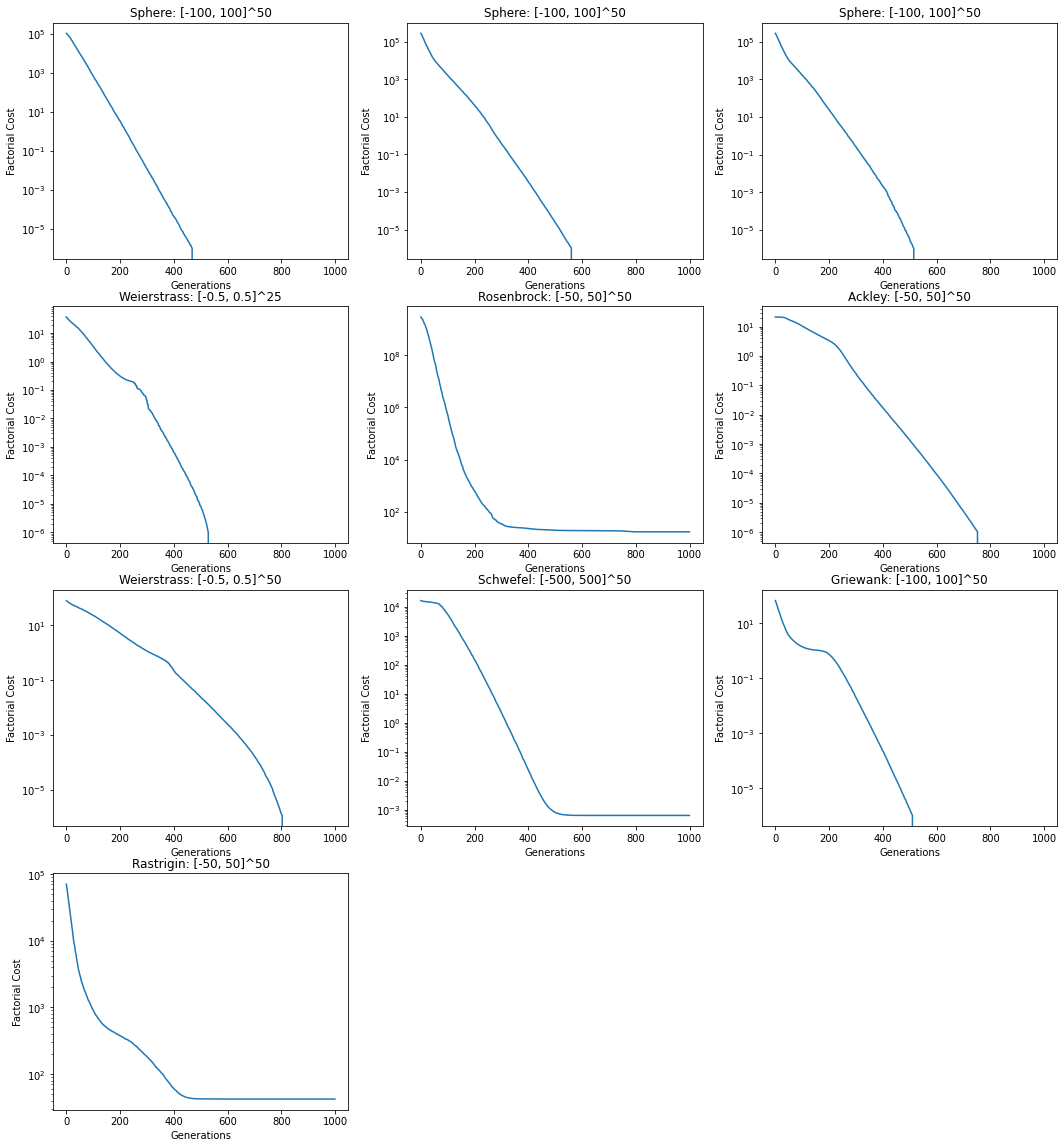

In [19]:
model.render_history(yscale= 'log')
print()